In [1]:
# Import packages

import pandas as pd 
import numpy as np 
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from scipy import stats

from joblib import dump, load

pd.set_option('display.max_columns', None)

C:\Users\imacd_0odruq3\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\imacd_0odruq3\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
nfl = pd.read_csv('../../data/nfl_game_by_game_raw_stats.csv')

In [3]:
nfl.head()

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,total_rushes,total_rush_yards,rushing_epa,rush_tds,qb_epa,qb_rush_yards,qb_rushing_epa,qb_rush_tds,total_qb_rush_attempts,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,sacks_allowed_team,qb_hits_allowed_team,fumbles_team,lost_fumbles_team,interceptions_thrown_team,total_rushes_allowed,total_rush_yards_allowed,rushing_epa_allowed,rush_tds_allowed,total_pass_attempts_allowed,passing_yards_allowed,completions_allowed,passing_epa_allowed,pass_tds_allowed,air_yards_allowed,yards_after_catch_allowed,air_epa_allowed,yac_epa_allowed,avg_cpoe_allowed,qb_epa_allowed,qb_rush_yards_allowed,qb_rushing_epa_allowed,qb_rush_tds_allowed,sacks,qb_hits,fumbles_forced,interceptions,fumbles_recovered,special_teams_epa,total_epa,total_opposing_epa
0,2014,1,ARI,LAC,18,17,C. Palmer,38,304.0,24.0,6.098425,2.0,196.0,108.0,10.800692,13.884696,3.160065,26,110.0,-7.697317,0.0,7.779734,30.0,1.681309,0.0,3.0,2.0,4.0,1.0,1.0,0.0,2.0,4.0,2.0,2.0,0.0,24,52.0,-8.805075,1.0,36,238.0,21.0,0.799435,1.0,148.0,90.0,8.328671,10.101167,-6.609174,-1.749010,10.0,-2.548446,0.0,0.0,4.0,0.0,1.0,0.0,-4.751772,1.654976,-1.654976
1,2014,1,ATL,NO,37,34,M. Ryan,42,448.0,31.0,17.253965,3.0,253.0,195.0,8.815695,16.383532,6.128030,25,123.0,2.559394,1.0,24.116820,15.0,0.272050,0.0,3.0,1.0,4.0,1.0,1.0,0.0,1.0,4.0,1.0,1.0,0.0,28,139.0,4.264254,3.0,42,333.0,29.0,9.202585,1.0,141.0,192.0,1.711281,22.435846,-0.291977,13.906331,2.0,-0.387024,0.0,0.0,0.0,1.0,1.0,1.0,-1.162613,5.183908,-5.183908
2,2014,1,BAL,CIN,16,23,J. Flacco,62,345.0,35.0,-4.871386,1.0,221.0,124.0,10.962930,14.313325,-11.889451,21,94.0,-0.093163,1.0,-3.078329,7.0,1.793058,0.0,3.0,3.0,6.0,0.0,0.0,1.0,3.0,6.0,1.0,1.0,1.0,24,81.0,-4.888501,0.0,39,303.0,25.0,11.252418,1.0,129.0,172.0,-3.613447,26.073280,-2.044220,7.354762,5.0,-3.897657,0.0,0.0,1.0,0.0,0.0,0.0,-2.107624,-13.436091,13.436091
3,2014,1,BUF,CHI,23,20,E. Manuel,22,173.0,16.0,0.368607,1.0,93.0,80.0,1.909633,9.530254,11.150598,31,197.0,4.315138,1.0,0.591515,23.0,0.222908,1.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,1.0,18,86.0,-0.055888,0.0,49,349.0,34.0,-6.755498,2.0,159.0,190.0,3.427141,16.035978,2.864331,0.058386,0.0,0.000000,0.0,2.0,4.0,1.0,2.0,1.0,3.721131,15.216262,-15.216262
4,2014,1,CAR,TB,20,14,D. Anderson,33,230.0,24.0,8.423189,2.0,160.0,70.0,6.298791,10.724494,9.822589,33,113.0,-6.247634,0.0,10.352312,10.0,1.929123,0.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,17,102.0,1.025410,0.0,35,183.0,22.0,-10.437735,2.0,138.0,45.0,6.082325,4.351872,0.519191,-3.645375,27.0,2.277812,0.0,3.0,9.0,2.0,2.0,1.0,-3.457676,8.130204,-8.130204


In [8]:
# Pull out only the rushing related stats

rushing = nfl.copy()
rushing = rushing[['season', 'week', 'team', 'opponent', 'score', 'opponent_score', 'total_rushes', 'total_rush_yards', 
       'rushing_epa', 'rush_tds', 'qb_rush_yards', 'qb_rushing_epa', 'qb_rush_tds']]
rushing = rushing.drop_duplicates()
rushing

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds,qb_rush_yards,qb_rushing_epa,qb_rush_tds
0,2014,1,ARI,LAC,18,17,26,110.0,-7.697317,0.0,30.0,1.681309,0.0
1,2014,1,ATL,NO,37,34,25,123.0,2.559394,1.0,15.0,0.272050,0.0
2,2014,1,BAL,CIN,16,23,21,94.0,-0.093163,1.0,7.0,1.793058,0.0
3,2014,1,BUF,CHI,23,20,31,197.0,4.315138,1.0,23.0,0.222908,1.0
4,2014,1,CAR,TB,20,14,33,113.0,-6.247634,0.0,10.0,1.929123,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,2022,21,PHI,SF,31,7,42,150.0,6.019785,4.0,39.0,1.492567,1.0
5866,2022,21,SF,PHI,7,31,24,81.0,-13.380709,1.0,0.0,0.000000,0.0
5868,2022,21,SF,PHI,7,31,24,81.0,-13.380709,1.0,2.0,-4.591173,0.0
5869,2022,22,KC,PHI,38,35,24,166.0,6.727197,1.0,48.0,3.553472,0.0


In [10]:
# Pull out only the rushing related stats, minus the qb specific ones

rb = nfl.copy()
rb = rb[['season', 'week', 'team', 'opponent', 'score', 'opponent_score', 'total_rushes', 'total_rush_yards', 
       'rushing_epa', 'rush_tds']]
rb = rb.drop_duplicates()
rb

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds
0,2014,1,ARI,LAC,18,17,26,110.0,-7.697317,0.0
1,2014,1,ATL,NO,37,34,25,123.0,2.559394,1.0
2,2014,1,BAL,CIN,16,23,21,94.0,-0.093163,1.0
3,2014,1,BUF,CHI,23,20,31,197.0,4.315138,1.0
4,2014,1,CAR,TB,20,14,33,113.0,-6.247634,0.0
...,...,...,...,...,...,...,...,...,...,...
5864,2022,21,KC,CIN,23,20,20,42.0,-4.389091,0.0
5865,2022,21,PHI,SF,31,7,42,150.0,6.019785,4.0
5866,2022,21,SF,PHI,7,31,24,81.0,-13.380709,1.0
5869,2022,22,KC,PHI,38,35,24,166.0,6.727197,1.0


In [11]:
# Look at the distribution of rushing epa. Should it be left as is? Scaled?

np.mean(rb.rushing_epa)

-1.0466404692882159

In [12]:
np.max(rb.rushing_epa)

21.332666

In [13]:
np.min(rb.rushing_epa)

-24.650354

In [17]:
best_rush_performance = rb.sort_values(by='rushing_epa', ascending=False)
best_rush_performance.head(20)

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds
5604,2022,12,PHI,GB,40,33,48,364.0,21.332666,3.0
5678,2022,14,PHI,NYG,48,22,30,254.0,20.417387,4.0
2212,2017,10,NO,BUF,47,10,44,301.0,20.222973,6.0
4238,2020,13,BAL,DAL,34,17,37,294.0,19.281342,2.0
4405,2020,17,BAL,CIN,38,3,54,404.0,17.979248,2.0
3983,2020,6,ARI,DAL,38,10,34,262.0,17.709873,3.0
4387,2020,16,NO,MIN,52,33,42,267.0,17.579145,7.0
2709,2018,6,LA,DEN,23,20,37,272.0,17.223526,2.0
351,2014,10,SEA,NYG,38,17,43,352.0,17.071670,5.0
5861,2022,20,PHI,NYG,38,7,43,269.0,17.021055,3.0


In [18]:
worst_rush_performance = rb.sort_values(by='rushing_epa', ascending=True)
worst_rush_performance.head(20)

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds
4279,2020,14,CIN,DAL,7,30,30,101.0,-24.650354,0.0
1182,2015,16,SEA,LA,17,23,22,59.0,-22.264070,0.0
3502,2019,10,PIT,LA,17,12,26,43.0,-20.347050,0.0
5172,2021,20,LA,TB,30,27,30,73.0,-20.310823,1.0
377,2014,11,PHI,GB,20,53,31,109.0,-20.012804,0.0
2483,2017,17,TEN,JAX,15,10,38,117.0,-19.525873,0.0
5664,2022,14,HOU,DAL,23,27,37,114.0,-19.098467,1.0
4205,2020,12,DEN,NO,3,31,33,100.0,-19.048563,0.0
5253,2022,2,TB,NO,20,10,28,74.0,-18.976500,0.0
1284,2016,1,TEN,MIN,16,25,22,64.0,-18.734577,0.0


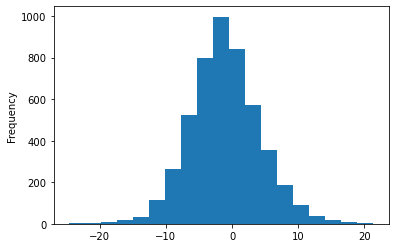

In [19]:
rb.rushing_epa.plot.hist(bins=19)

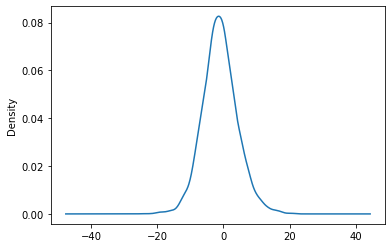

In [20]:
rb.rushing_epa.plot.kde()

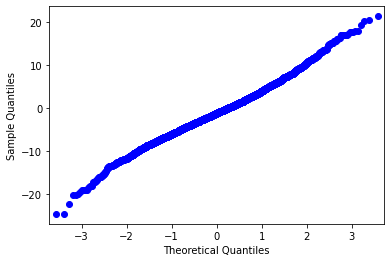

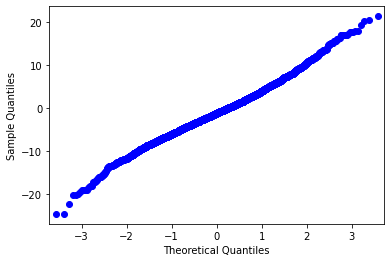

In [22]:
sm.qqplot(rushing.rushing_epa)

In [23]:
# Looks normal, creating a variable to normalize rushing_epa

rushing_epa_mean = np.mean(rb.rushing_epa)
rushing_epa_std = np.std(rb.rushing_epa)
rb['rushing_epa_standardized'] = rb.apply(lambda x: (x.rushing_epa - rushing_epa_mean)/rushing_epa_std, axis=1)
rb.head()

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds,rushing_epa_standardized
0,2014,1,ARI,LAC,18,17,26,110.0,-7.697317,0.0,-1.258735
1,2014,1,ATL,NO,37,34,25,123.0,2.559394,1.0,0.682493
2,2014,1,BAL,CIN,16,23,21,94.0,-0.093163,1.0,0.180459
3,2014,1,BUF,CHI,23,20,31,197.0,4.315138,1.0,1.014793
4,2014,1,CAR,TB,20,14,33,113.0,-6.247634,0.0,-0.984362


In [24]:
# Komolgorov smirnov test for normality

stats.kstest(rb.rushing_epa_standardized, stats.norm.cdf)

KstestResult(statistic=0.030328498949411142, pvalue=0.0002470483737488867)

In [25]:
# Want to also take a look at using rushing epa per play

rb['rushing_epa_per_attempt'] = rb.apply(lambda x: x.rushing_epa/x.total_rushes, axis=1)

In [26]:
# See best and worst performances

best_rush_performances_per_attempt = rb.sort_values(by='rushing_epa_per_attempt', ascending=False)
best_rush_performances_per_attempt.head(20)

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds,rushing_epa_standardized,rushing_epa_per_attempt
5678,2022,14,PHI,NYG,48,22,30,254.0,20.417387,4.0,4.062372,0.680580
5154,2021,19,BUF,NE,47,17,26,176.0,16.197870,2.0,3.263769,0.622995
3069,2018,16,GB,NYJ,44,38,20,130.0,11.202056,3.0,2.318240,0.560103
2837,2018,10,GB,MIA,31,12,22,198.0,12.302527,2.0,2.526520,0.559206
2998,2018,14,MIA,NE,34,33,21,189.0,11.640470,2.0,2.401216,0.554308
1155,2015,16,CAR,ATL,13,20,20,155.0,11.044158,1.0,2.288355,0.552208
3755,2019,17,KC,LAC,31,21,21,164.0,11.556115,2.0,2.385251,0.550291
1324,2016,3,ATL,NO,45,32,29,219.0,15.580255,3.0,3.146876,0.537250
4374,2020,16,HOU,CIN,31,37,17,166.0,8.963511,1.0,1.894563,0.527265
4469,2020,20,BUF,KC,24,38,18,129.0,9.410161,0.0,1.979098,0.522787


In [27]:
worst_rush_performances_per_attempt = rb.sort_values(by='rushing_epa_per_attempt', ascending=True)
worst_rush_performances_per_attempt.head(20)

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds,rushing_epa_standardized,rushing_epa_per_attempt
3383,2019,7,CHI,NO,25,36,7,17.0,-12.140250,0.0,-2.099623,-1.734321
1708,2016,14,DEN,TEN,10,13,9,18.0,-10.153645,0.0,-1.723630,-1.128183
1182,2015,16,SEA,LA,17,23,22,59.0,-22.264070,0.0,-4.015700,-1.012003
3204,2019,2,CAR,TB,14,20,19,39.0,-18.469515,0.0,-3.297527,-0.972080
1185,2015,16,TEN,HOU,6,34,11,30.0,-10.539284,0.0,-1.796618,-0.958117
4217,2020,12,LV,ATL,6,43,14,40.0,-12.134264,0.0,-2.098490,-0.866733
5296,2022,4,CAR,ARI,16,26,13,40.0,-11.143678,0.0,-1.911008,-0.857206
1284,2016,1,TEN,MIN,16,25,22,64.0,-18.734577,0.0,-3.347693,-0.851572
1760,2016,15,MIN,IND,6,34,9,34.0,-7.438316,0.0,-1.209716,-0.826480
4279,2020,14,CIN,DAL,7,30,30,101.0,-24.650354,0.0,-4.467338,-0.821678


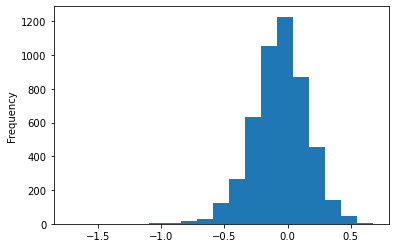

In [28]:
rb.rushing_epa_per_attempt.plot.hist(bins=19)

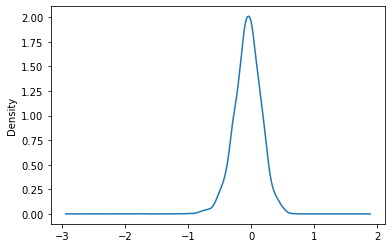

In [30]:
rb.rushing_epa_per_attempt.plot.kde()

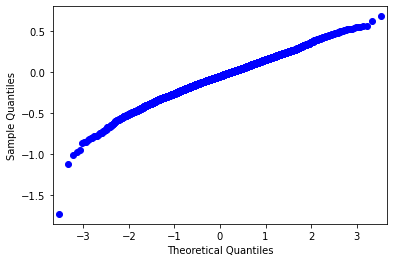

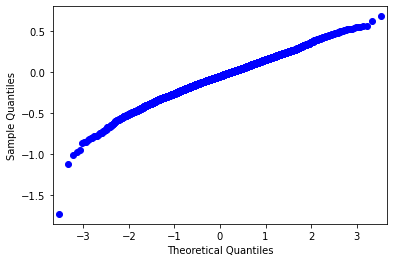

In [31]:
sm.qqplot(rb.rushing_epa_per_attempt)

In [32]:
# 2019 Bears vs Saints performance was so bad, it may need to be removed as an outlier

In [33]:
np.mean(rb.rushing_epa_per_attempt)

-0.05741093335492103

In [35]:
np.std(rb.rushing_epa_per_attempt)

0.21471387412278203

In [36]:
rb_no_bears = rb[rb.rushing_epa_per_attempt > -1.5]

In [37]:
np.mean(rb_no_bears.rushing_epa_per_attempt)

-0.05706723372482952

In [38]:
np.std(rb_no_bears.rushing_epa_per_attempt)

0.21338937455199694

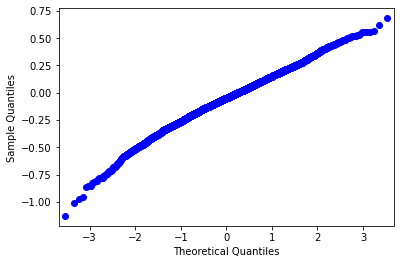

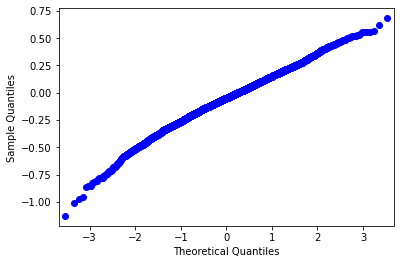

In [40]:
sm.qqplot(rb_no_bears.rushing_epa_per_attempt)

In [41]:
# Looks normal without that data point, creating a variable to normalize rushing_epa_per_attempt

rushing_epa_pa_mean = np.mean(rb_no_bears.rushing_epa_per_attempt)
rushing_epa_pa_std = np.std(rb_no_bears.rushing_epa_per_attempt)
rb['rushing_epa_per_attempt_standardized'] = rb.apply(lambda x: (x.rushing_epa_per_attempt - rushing_epa_pa_mean)/rushing_epa_pa_std, axis=1)
rb.head()

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds,rushing_epa_standardized,rushing_epa_per_attempt,rushing_epa_per_attempt_standardized
0,2014,1,ARI,LAC,18,17,26,110.0,-7.697317,0.0,-1.258735,-0.296051,-1.119941
1,2014,1,ATL,NO,37,34,25,123.0,2.559394,1.0,0.682493,0.102376,0.747193
2,2014,1,BAL,CIN,16,23,21,94.0,-0.093163,1.0,0.180459,-0.004436,0.246643
3,2014,1,BUF,CHI,23,20,31,197.0,4.315138,1.0,1.014793,0.139198,0.919752
4,2014,1,CAR,TB,20,14,33,113.0,-6.247634,0.0,-0.984362,-0.189322,-0.619783


In [45]:
# Komolgorov smirnov test for normality

# Pretty sure this is approximately normal, KS test might be too sensitive

test_df = rb[np.abs(rb.rushing_epa_per_attempt_standardized) < 4.5]
stats.kstest(test_df.rushing_epa_per_attempt_standardized, stats.norm.cdf)

KstestResult(statistic=0.02934366811209488, pvalue=0.0004402985226725937)

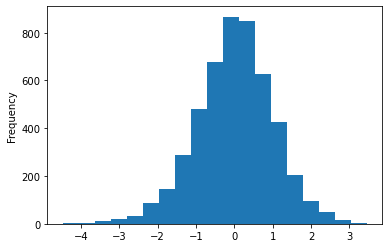

In [46]:
test_df.rushing_epa_per_attempt_standardized.plot.hist(bins=19)

In [47]:
# Not sure what value is better between totalrushing epa standardized or rushing epa per play standardized

# Looking at the cases with the biggest differences in the two values

rb['rush_discrepancy'] = rb.apply(lambda x: x.rushing_epa_standardized - x.rushing_epa_per_attempt_standardized, axis=1)
rb['rush_discrepancy_abs'] = rb.apply(lambda x: np.abs(x.rushing_epa_standardized - x.rushing_epa_per_attempt_standardized), axis=1)

In [50]:
# Rushing epa is higher

rb.sort_values(by='rush_discrepancy', ascending=False).head(20)

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds,rushing_epa_standardized,rushing_epa_per_attempt,rushing_epa_per_attempt_standardized,rush_discrepancy,rush_discrepancy_abs
3383,2019,7,CHI,NO,25,36,7,17.0,-12.140250,0.0,-2.099623,-1.734321,-7.860064,5.760441,5.760441
1708,2016,14,DEN,TEN,10,13,9,18.0,-10.153645,0.0,-1.723630,-1.128183,-5.019536,3.295905,3.295905
1185,2015,16,TEN,HOU,6,34,11,30.0,-10.539284,0.0,-1.796618,-0.958117,-4.222560,2.425943,2.425943
1760,2016,15,MIN,IND,6,34,9,34.0,-7.438316,0.0,-1.209716,-0.826480,-3.605673,2.395958,2.395958
4971,2021,14,JAX,TEN,0,20,8,8.0,-5.730070,0.0,-0.886406,-0.716259,-3.089148,2.202743,2.202743
5604,2022,12,PHI,GB,40,33,48,364.0,21.332666,3.0,4.235602,0.444431,2.350153,1.885448,1.885448
2611,2018,3,MIN,BUF,6,27,6,14.0,-3.227622,0.0,-0.412782,-0.537937,-2.253485,1.840703,1.840703
5296,2022,4,CAR,ARI,16,26,13,40.0,-11.143678,0.0,-1.911008,-0.857206,-3.749665,1.838658,1.838658
549,2014,16,IND,DAL,7,42,10,1.0,-6.775551,0.0,-1.084278,-0.677555,-2.907773,1.823495,1.823495
997,2015,11,WAS,CAR,16,44,12,14.0,-9.381143,0.0,-1.577423,-0.781762,-3.396114,1.818691,1.818691


In [51]:
# Rushing epa per play is higher

rb.sort_values(by='rush_discrepancy', ascending=True).head(20)

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds,rushing_epa_standardized,rushing_epa_per_attempt,rushing_epa_per_attempt_standardized,rush_discrepancy,rush_discrepancy_abs
268,2014,8,IND,PIT,34,51,9,64.0,4.313873,1.0,1.014553,0.479319,2.513651,-1.499098,1.499098
507,2014,15,HOU,IND,10,17,41,137.0,-18.189377,0.0,-3.244507,-0.443643,-1.811600,-1.432907,1.432907
2483,2017,17,TEN,JAX,15,10,38,117.0,-19.525873,0.0,-3.497457,-0.513839,-2.140554,-1.356903,1.356903
1246,2015,19,SEA,CAR,24,31,12,78.0,6.121391,0.0,1.356652,0.510116,2.657973,-1.301321,1.301321
5664,2022,14,HOU,DAL,23,27,37,114.0,-19.098467,1.0,-3.416565,-0.516175,-2.151501,-1.265063,1.265063
2316,2017,13,KC,NYJ,31,38,11,112.0,4.485416,0.0,1.047020,0.407765,2.178329,-1.131309,1.131309
1120,2015,15,CIN,SF,24,14,36,68.0,-16.929180,2.0,-3.005996,-0.470255,-1.936309,-1.069687,1.069687
3984,2020,6,ATL,MIN,40,23,36,100.0,-16.175983,0.0,-2.863443,-0.449333,-1.838262,-1.025181,1.025181
5378,2022,6,CIN,NO,30,26,13,76.0,5.492002,1.0,1.237531,0.422462,2.247202,-1.009671,1.009671
5703,2022,15,IND,MIN,36,39,42,172.0,-11.880250,0.0,-2.050415,-0.282863,-1.058140,-0.992274,0.992274


In [52]:
# See where they are nearly identical

rb.sort_values(by='rush_discrepancy_abs', ascending=True).head(20)

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds,rushing_epa_standardized,rushing_epa_per_attempt,rushing_epa_per_attempt_standardized,rush_discrepancy,rush_discrepancy_abs
5757,2022,16,SEA,KC,10,24,31,133.0,1.820397,0.0,0.542628,0.058722,0.542622,0.000006,0.000006
5271,2022,3,JAX,LAC,38,10,34,153.0,1.350159,1.0,0.453628,0.039711,0.453527,0.000102,0.000102
1103,2015,14,NYJ,TEN,30,8,34,183.0,1.350855,0.0,0.453760,0.039731,0.453623,0.000137,0.000137
5546,2022,11,CIN,PIT,37,30,22,64.0,-2.903927,0.0,-0.351518,-0.131997,-0.351139,-0.000378,0.000378
4109,2020,9,LV,LAC,31,26,26,160.0,7.730333,2.0,1.661167,0.297321,1.660756,0.000411,0.000411
2344,2017,14,DAL,NYG,30,10,28,125.0,3.145869,1.0,0.793492,0.112352,0.793946,-0.000454,0.000454
3897,2020,3,MIA,JAX,31,13,35,139.0,1.243596,2.0,0.433460,0.035531,0.433942,-0.000482,0.000482
4949,2021,13,NYJ,PHI,18,33,16,71.0,-0.664212,1.0,0.072380,-0.041513,0.072890,-0.000510,0.000510
4216,2020,12,LAC,BUF,17,27,24,76.0,-11.466673,1.0,-1.972139,-0.477778,-1.971564,-0.000575,0.000575
2102,2017,7,CIN,PIT,14,29,16,72.0,-0.663346,0.0,0.072544,-0.041459,0.073144,-0.000600,0.000600


In [53]:
# Still not sure whats best. Per attempt gives higher praise for good games w few rushes and penalized more heavily for
# bad games with fewer rushes. Going to start with total, but may need to change this later.

rb_to_save = rb.copy()
rb_to_save['rushing_value'] = rb_to_save.rushing_epa_standardized
rb_to_save.head()

,season,week,team,opponent,score,opponent_score,total_rushes,total_rush_yards,rushing_epa,rush_tds,rushing_epa_standardized,rushing_epa_per_attempt,rushing_epa_per_attempt_standardized,rush_discrepancy,rush_discrepancy_abs,rushing_value
0,2014,1,ARI,LAC,18,17,26,110.0,-7.697317,0.0,-1.258735,-0.296051,-1.119941,-0.138794,0.138794,-1.258735
1,2014,1,ATL,NO,37,34,25,123.0,2.559394,1.0,0.682493,0.102376,0.747193,-0.064699,0.064699,0.682493
2,2014,1,BAL,CIN,16,23,21,94.0,-0.093163,1.0,0.180459,-0.004436,0.246643,-0.066183,0.066183,0.180459
3,2014,1,BUF,CHI,23,20,31,197.0,4.315138,1.0,1.014793,0.139198,0.919752,0.095041,0.095041,1.014793
4,2014,1,CAR,TB,20,14,33,113.0,-6.247634,0.0,-0.984362,-0.189322,-0.619783,-0.364579,0.364579,-0.984362


In [54]:
rb_to_save.to_csv('rushing_value_model_v2_data/rushing_with_value.csv')